**ASSUMPTION OF LINEAR REGRESSION**

C:\Users\HP\AppData\Local\Temp\ipykernel_7368\3409598981.py:98: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 2].boxplot(box_data, labels=['Normal', 'Non-normal'])


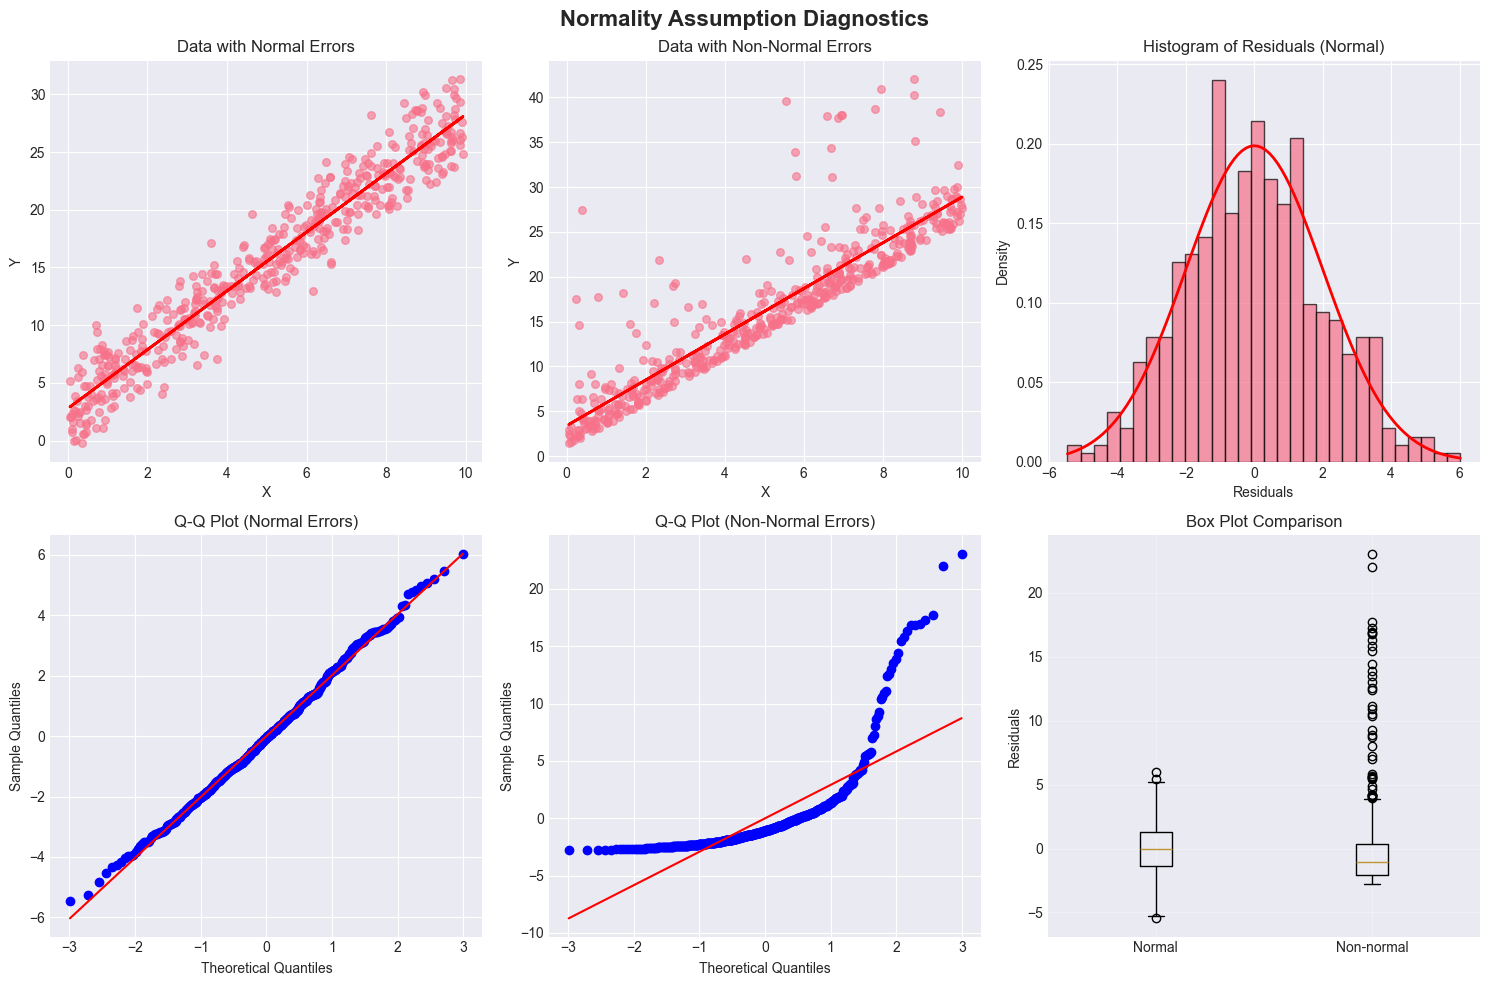

STATISTICAL TESTS FOR NORMALITY

Normal Errors Model:
  Shapiro-Wilk Test: Statistic = 0.9968, p-value = 0.4414
  Kolmogorov-Smirnov: Statistic = 0.0277, p-value = 0.8281
  Skewness: 0.1446 (Ideal: 0, Normal range: -1 to 1)
  Kurtosis: -0.2137 (Ideal: 0, Normal range: -2 to 2)

Non-Normal Errors Model:
  Shapiro-Wilk Test: Statistic = 0.6173, p-value = 0.0000
  Kolmogorov-Smirnov: Statistic = 0.2252, p-value = 0.0000
  Skewness: 3.2681 (Ideal: 0, Normal range: -1 to 1)
  Kurtosis: 12.2419 (Ideal: 0, Normal range: -2 to 2)

INTERPRETATION:
H0: Residuals are normally distributed
Reject H0 if p-value < 0.05 (significance level)

Normal Model: Normality NOT rejected
Non-Normal Model: Normality REJECTED

PRACTICAL IMPACT ON REGRESSION RESULTS

Normal Model:
  Intercept: 2.7859 (True: 3.0)
  Slope: 2.5460 (True: 2.5)
  Intercept SE: 0.1752
  Slope SE: 0.0301

Non-Normal Model:
  Intercept: 3.3872 (True: 3.0)
  Slope: 2.5485 (True: 2.5)
  Intercept SE: 0.3338
  Slope SE: 0.0572


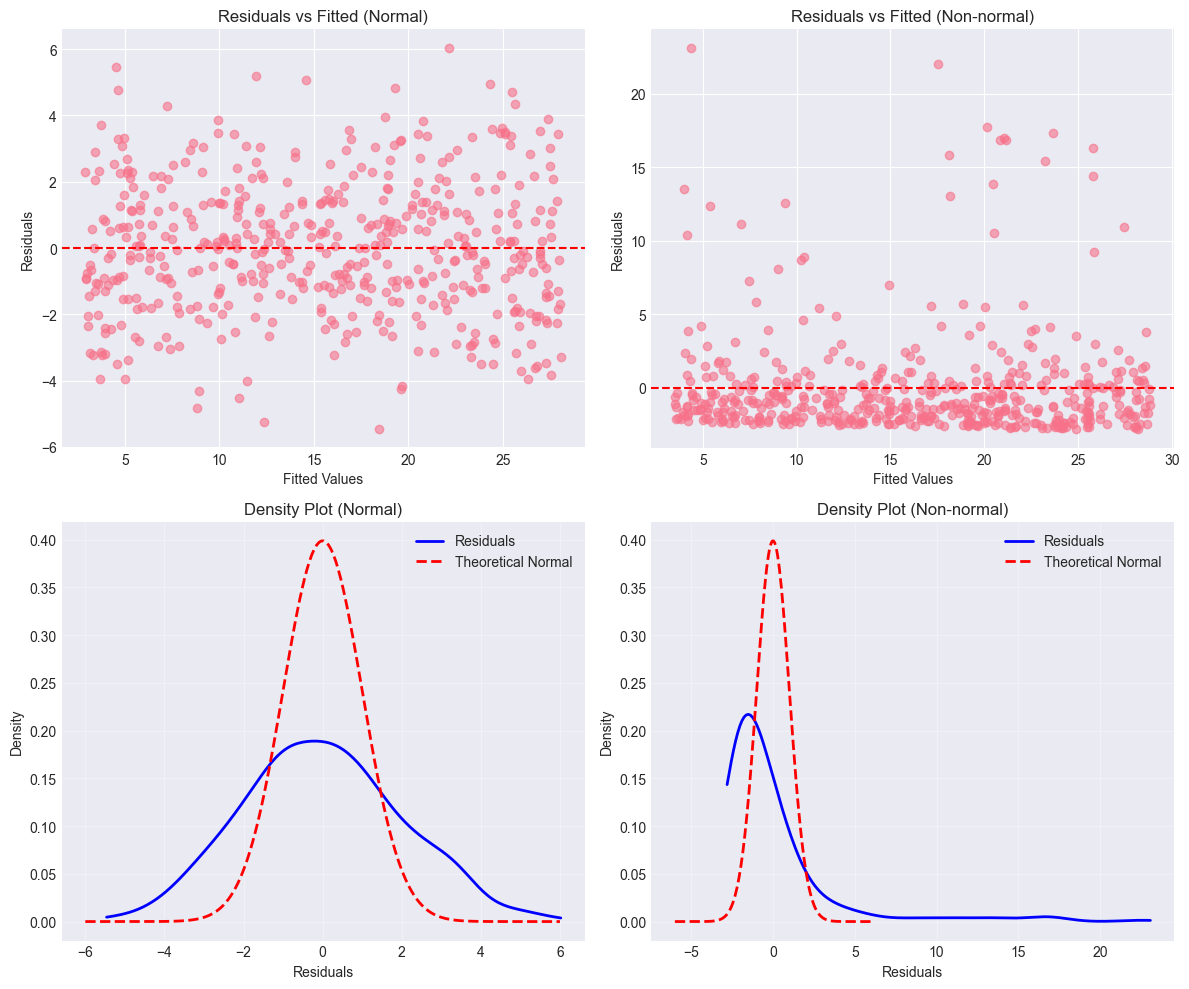


HOW TO INTERPRET NORMALITY DIAGNOSTICS

1. Q-Q PLOT INTERPRETATION:
   - Points follow the red line: Good normality
   - Points curve upward at ends: Heavy tails
   - Points curve downward at ends: Light tails
   - Points form an S-shape: Skewed distribution

2. HISTOGRAM INTERPRETATION:
   - Bell-shaped curve: Good normality
   - Skewed to right/left: Non-normal
   - Multiple peaks: Non-normal, possible mixture distribution

3. STATISTICAL TESTS:
   - p-value > 0.05: Fail to reject normality
   - p-value < 0.05: Reject normality assumption
   - Note: Tests are sensitive to sample size

4. WHEN TO WORRY:
   - Small sample (n < 30) + non-normal: Problematic
   - Large sample (n > 100): Less critical (Central Limit Theorem)
   - Extreme skewness (>2) or outliers: Consider transformation

5. REMEDIES FOR NON-NORMALITY:
   - Transform Y: log(y), sqrt(y), 1/y
   - Remove outliers if justified
   - Use robust regression methods
   - Use bootstrapping for confidence intervals
   - Consider G

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Generate synthetic data
np.random.seed(42)

# ================================
# 1. DATA WITH NORMAL ERRORS
# ================================
n_samples = 500
X_normal = np.random.uniform(0, 10, n_samples).reshape(-1, 1)
true_beta = 2.5
true_alpha = 3.0

# Generate normal errors
normal_errors = np.random.normal(loc=0, scale=2, size=n_samples)
y_normal = true_alpha + true_beta * X_normal.flatten() + normal_errors

# ================================
# 2. DATA WITH NON-NORMAL ERRORS
# ================================
X_nonnormal = np.random.uniform(0, 10, n_samples).reshape(-1, 1)

# Generate non-normal errors (exponential for positive skew)
nonnormal_errors = np.random.exponential(scale=2, size=n_samples) - 2
# Add some outliers
outlier_indices = np.random.choice(n_samples, size=20, replace=False)
nonnormal_errors[outlier_indices] += np.random.uniform(10, 20, 20)

y_nonnormal = true_alpha + true_beta * X_nonnormal.flatten() + nonnormal_errors

# ================================
# 3. FIT REGRESSION MODELS
# ================================
# Fit models
model_norm = LinearRegression().fit(X_normal, y_normal)
model_non = LinearRegression().fit(X_nonnormal, y_nonnormal)

# Get predictions and residuals
y_pred_norm = model_norm.predict(X_normal)
y_pred_non = model_non.predict(X_nonnormal)

residuals_norm = y_normal - y_pred_norm
residuals_non = y_nonnormal - y_pred_non

# ================================
# 4. VISUAL DIAGNOSTIC PLOTS
# ================================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Normality Assumption Diagnostics', fontsize=16, fontweight='bold')

# Plot 1: Scatter plot with regression line (Normal)
axes[0, 0].scatter(X_normal, y_normal, alpha=0.6, s=30)
axes[0, 0].plot(X_normal, y_pred_norm, color='red', linewidth=2)
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].set_title('Data with Normal Errors')

# Plot 2: Scatter plot with regression line (Non-normal)
axes[0, 1].scatter(X_nonnormal, y_nonnormal, alpha=0.6, s=30)
axes[0, 1].plot(X_nonnormal, y_pred_non, color='red', linewidth=2)
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('Y')
axes[0, 1].set_title('Data with Non-Normal Errors')

# Plot 3: Histogram of residuals (Normal)
axes[0, 2].hist(residuals_norm, bins=30, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(residuals_norm.min(), residuals_norm.max(), 100)
axes[0, 2].plot(x, stats.norm.pdf(x, residuals_norm.mean(), residuals_norm.std()), 
                'r-', linewidth=2)
axes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Histogram of Residuals (Normal)')

# Plot 4: Q-Q plot using scipy (Normal)
stats.probplot(residuals_norm, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Errors)')
axes[1, 0].set_xlabel('Theoretical Quantiles')
axes[1, 0].set_ylabel('Sample Quantiles')

# Plot 5: Q-Q plot using scipy (Non-normal)
stats.probplot(residuals_non, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Non-Normal Errors)')
axes[1, 1].set_xlabel('Theoretical Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')

# Plot 6: Box plot comparison
box_data = [residuals_norm, residuals_non]
axes[1, 2].boxplot(box_data, labels=['Normal', 'Non-normal'])
axes[1, 2].set_ylabel('Residuals')
axes[1, 2].set_title('Box Plot Comparison')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================
# 5. STATISTICAL TESTS FOR NORMALITY
# ================================
print("=" * 70)
print("STATISTICAL TESTS FOR NORMALITY")
print("=" * 70)

# Shapiro-Wilk test
shapiro_norm = stats.shapiro(residuals_norm)
shapiro_non = stats.shapiro(residuals_non)

# Kolmogorov-Smirnov test
ks_norm = stats.kstest(residuals_norm, 'norm', 
                       args=(residuals_norm.mean(), residuals_norm.std()))
ks_non = stats.kstest(residuals_non, 'norm',
                      args=(residuals_non.mean(), residuals_non.std()))

# Skewness and Kurtosis
skew_norm = stats.skew(residuals_norm)
kurt_norm = stats.kurtosis(residuals_norm)
skew_non = stats.skew(residuals_non)
kurt_non = stats.kurtosis(residuals_non)

print(f"\nNormal Errors Model:")
print(f"  Shapiro-Wilk Test: Statistic = {shapiro_norm[0]:.4f}, p-value = {shapiro_norm[1]:.4f}")
print(f"  Kolmogorov-Smirnov: Statistic = {ks_norm.statistic:.4f}, p-value = {ks_norm.pvalue:.4f}")
print(f"  Skewness: {skew_norm:.4f} (Ideal: 0, Normal range: -1 to 1)")
print(f"  Kurtosis: {kurt_norm:.4f} (Ideal: 0, Normal range: -2 to 2)")

print(f"\nNon-Normal Errors Model:")
print(f"  Shapiro-Wilk Test: Statistic = {shapiro_non[0]:.4f}, p-value = {shapiro_non[1]:.4f}")
print(f"  Kolmogorov-Smirnov: Statistic = {ks_non.statistic:.4f}, p-value = {ks_non.pvalue:.4f}")
print(f"  Skewness: {skew_non:.4f} (Ideal: 0, Normal range: -1 to 1)")
print(f"  Kurtosis: {kurt_non:.4f} (Ideal: 0, Normal range: -2 to 2)")

# Interpretation
print("\nINTERPRETATION:")
print("H0: Residuals are normally distributed")
print("Reject H0 if p-value < 0.05 (significance level)")
print(f"\nNormal Model: {'Normality NOT rejected' if shapiro_norm[1] > 0.05 else 'Normality REJECTED'}")
print(f"Non-Normal Model: {'Normality NOT rejected' if shapiro_non[1] > 0.05 else 'Normality REJECTED'}")

# ================================
# 6. PRACTICAL IMPACT ANALYSIS
# ================================
print("\n" + "=" * 70)
print("PRACTICAL IMPACT ON REGRESSION RESULTS")
print("=" * 70)

# Calculate standard errors manually
def calculate_standard_errors(X, y, model):
    n = len(y)
    y_pred = model.predict(X)
    residuals = y - y_pred
    RSS = np.sum(residuals**2)
    MSE = RSS / (n - 2)  # n - number of parameters
    
    # Add intercept column
    X_with_intercept = np.c_[np.ones((n, 1)), X]
    
    # Calculate variance-covariance matrix
    try:
        var_cov = MSE * np.linalg.inv(X_with_intercept.T @ X_with_intercept)
        std_errors = np.sqrt(np.diag(var_cov))
        return std_errors
    except:
        return [np.nan, np.nan]

# Get standard errors
se_norm = calculate_standard_errors(X_normal, y_normal, model_norm)
se_non = calculate_standard_errors(X_nonnormal, y_nonnormal, model_non)

print(f"\nNormal Model:")
print(f"  Intercept: {model_norm.intercept_:.4f} (True: {true_alpha})")
print(f"  Slope: {model_norm.coef_[0]:.4f} (True: {true_beta})")
if not np.isnan(se_norm[0]):
    print(f"  Intercept SE: {se_norm[0]:.4f}")
    print(f"  Slope SE: {se_norm[1]:.4f}")

print(f"\nNon-Normal Model:")
print(f"  Intercept: {model_non.intercept_:.4f} (True: {true_alpha})")
print(f"  Slope: {model_non.coef_[0]:.4f} (True: {true_beta})")
if not np.isnan(se_non[0]):
    print(f"  Intercept SE: {se_non[0]:.4f}")
    print(f"  Slope SE: {se_non[1]:.4f}")

# ================================
# 7. ADDITIONAL DIAGNOSTIC VISUALIZATIONS
# ================================
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted values
axes2[0, 0].scatter(y_pred_norm, residuals_norm, alpha=0.6)
axes2[0, 0].axhline(y=0, color='r', linestyle='--')
axes2[0, 0].set_xlabel('Fitted Values')
axes2[0, 0].set_ylabel('Residuals')
axes2[0, 0].set_title('Residuals vs Fitted (Normal)')

axes2[0, 1].scatter(y_pred_non, residuals_non, alpha=0.6)
axes2[0, 1].axhline(y=0, color='r', linestyle='--')
axes2[0, 1].set_xlabel('Fitted Values')
axes2[0, 1].set_ylabel('Residuals')
axes2[0, 1].set_title('Residuals vs Fitted (Non-normal)')

# Kernel density plots
from scipy.stats import gaussian_kde

# Normal errors density
density_norm = gaussian_kde(residuals_norm)
xs_norm = np.linspace(residuals_norm.min(), residuals_norm.max(), 200)
axes2[1, 0].plot(xs_norm, density_norm(xs_norm), 'b-', linewidth=2, label='Residuals')
xs_theoretical = np.linspace(-6, 6, 200)
axes2[1, 0].plot(xs_theoretical, stats.norm.pdf(xs_theoretical), 'r--', 
                linewidth=2, label='Theoretical Normal')
axes2[1, 0].set_xlabel('Residuals')
axes2[1, 0].set_ylabel('Density')
axes2[1, 0].set_title('Density Plot (Normal)')
axes2[1, 0].legend()
axes2[1, 0].grid(True, alpha=0.3)

# Non-normal errors density
density_non = gaussian_kde(residuals_non)
xs_non = np.linspace(residuals_non.min(), residuals_non.max(), 200)
axes2[1, 1].plot(xs_non, density_non(xs_non), 'b-', linewidth=2, label='Residuals')
axes2[1, 1].plot(xs_theoretical, stats.norm.pdf(xs_theoretical), 'r--', 
                linewidth=2, label='Theoretical Normal')
axes2[1, 1].set_xlabel('Residuals')
axes2[1, 1].set_ylabel('Density')
axes2[1, 1].set_title('Density Plot (Non-normal)')
axes2[1, 1].legend()
axes2[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ================================
# 8. INTERPRETATION GUIDE
# ================================
print("\n" + "=" * 70)
print("HOW TO INTERPRET NORMALITY DIAGNOSTICS")
print("=" * 70)

print("\n1. Q-Q PLOT INTERPRETATION:")
print("   - Points follow the red line: Good normality")
print("   - Points curve upward at ends: Heavy tails")
print("   - Points curve downward at ends: Light tails")
print("   - Points form an S-shape: Skewed distribution")

print("\n2. HISTOGRAM INTERPRETATION:")
print("   - Bell-shaped curve: Good normality")
print("   - Skewed to right/left: Non-normal")
print("   - Multiple peaks: Non-normal, possible mixture distribution")

print("\n3. STATISTICAL TESTS:")
print("   - p-value > 0.05: Fail to reject normality")
print("   - p-value < 0.05: Reject normality assumption")
print("   - Note: Tests are sensitive to sample size")

print("\n4. WHEN TO WORRY:")
print("   - Small sample (n < 30) + non-normal: Problematic")
print("   - Large sample (n > 100): Less critical (Central Limit Theorem)")
print("   - Extreme skewness (>2) or outliers: Consider transformation")

print("\n5. REMEDIES FOR NON-NORMALITY:")
print("   - Transform Y: log(y), sqrt(y), 1/y")
print("   - Remove outliers if justified")
print("   - Use robust regression methods")
print("   - Use bootstrapping for confidence intervals")
print("   - Consider Generalized Linear Models")

1. DATA GENERATION AND EXPLORATION

Dataset Overview:
Number of observations: 300
Number of variables: 6
Variables: ['X1', 'X2', 'X3', 'X1_sq', 'X1_X2', 'y']

Descriptive Statistics:
           X1      X2      X3   X1_sq   X1_X2       y
count  300.00  300.00  300.00  300.00  300.00  300.00
mean    49.92   10.63   47.79   27.09    2.63  185.39
std     14.76   11.38   28.28   15.51    3.06   61.93
min      1.38    0.11    0.46    0.02    0.02   11.55
25%     39.75    2.74   22.81   15.80    0.68  143.29
50%     50.89    6.80   47.18   25.90    1.56  183.27
75%     59.40   14.69   72.23   35.28    3.47  220.40
max    107.79   81.72   99.69  116.19   25.22  404.03

Correlation Matrix:
          X1     X2     X3  X1_sq  X1_X2      y
X1     1.000 -0.031 -0.044  0.975  0.199  0.877
X2    -0.031  1.000  0.033 -0.044  0.939 -0.337
X3    -0.044  0.033  1.000 -0.028  0.032  0.273
X1_sq  0.975 -0.044 -0.028  1.000  0.178  0.876
X1_X2  0.199  0.939  0.032  0.178  1.000 -0.116
y      0.877 -0.337  0

IndexError: index 4 is out of bounds for axis 1 with size 4

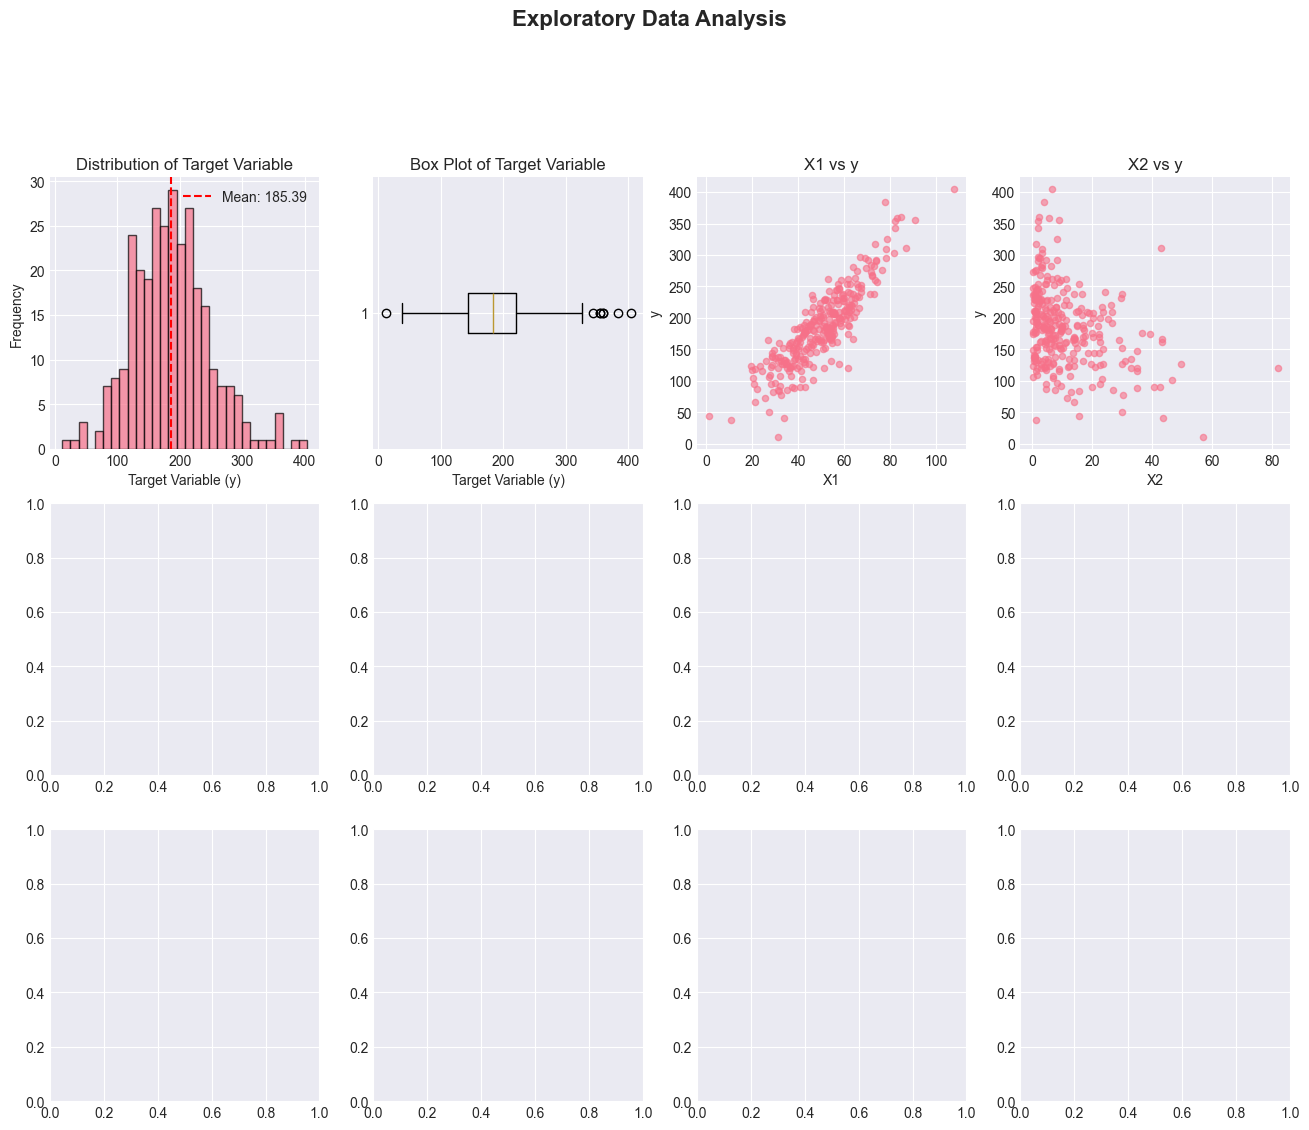

In [3]:
# ============================================
# COMPLETE REGRESSION ANALYSIS MASTER CODE
# ============================================

# First, install required packages if needed
# Uncomment and run if packages are not installed:
# !pip install numpy pandas matplotlib seaborn scipy scikit-learn statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

# ============================================
# 1. DATA GENERATION AND EXPLORATION
# ============================================
print("=" * 70)
print("1. DATA GENERATION AND EXPLORATION")
print("=" * 70)

# Generate synthetic dataset with multiple predictors
n_samples = 300

# Predictor variables
X1 = np.random.normal(50, 15, n_samples)  # Variable 1
X2 = np.random.exponential(10, n_samples)  # Variable 2
X3 = np.random.uniform(0, 100, n_samples)  # Variable 3

# Create interactions and polynomial terms
X1_sq = X1 ** 2 * 0.01
X1_X2 = X1 * X2 * 0.005

# True coefficients
true_intercept = 10
true_beta1 = 2.5
true_beta2 = -1.8
true_beta3 = 0.7
true_beta_sq = 1.2
true_beta_interaction = 0.5

# Generate response variable with noise
error_std = 8
true_y = (true_intercept + 
          true_beta1 * X1 + 
          true_beta2 * X2 + 
          true_beta3 * X3 + 
          true_beta_sq * X1_sq + 
          true_beta_interaction * X1_X2)

# Add normally distributed errors
errors = np.random.normal(0, error_std, n_samples)
y = true_y + errors

# Add some outliers
outlier_idx = np.random.choice(n_samples, 10, replace=False)
y[outlier_idx] = y[outlier_idx] + np.random.uniform(30, 50, 10)

# Create DataFrame
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'X1_sq': X1_sq,
    'X1_X2': X1_X2,
    'y': y
})

print("\nDataset Overview:")
print(f"Number of observations: {df.shape[0]}")
print(f"Number of variables: {df.shape[1]}")
print(f"Variables: {list(df.columns)}")

print("\nDescriptive Statistics:")
print(df.describe().round(2))

print("\nCorrelation Matrix:")
print(df.corr().round(3))

# ============================================
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================
print("\n" + "=" * 70)
print("2. EXPLORATORY DATA ANALYSIS")
print("=" * 70)

# Create comprehensive EDA plots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle('Exploratory Data Analysis', fontsize=16, fontweight='bold', y=1.02)

# 1. Distribution of target variable
axes[0, 0].hist(df['y'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['y'].mean(), color='red', linestyle='--', label=f'Mean: {df["y"].mean():.2f}')
axes[0, 0].set_xlabel('Target Variable (y)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Target Variable')
axes[0, 0].legend()

# 2. Boxplot of target variable
axes[0, 1].boxplot(df['y'], vert=False)
axes[0, 1].set_xlabel('Target Variable (y)')
axes[0, 1].set_title('Box Plot of Target Variable')

# 3-5. Scatter plots of predictors vs target
for idx, var in enumerate(['X1', 'X2', 'X3']):
    axes[0, 2+idx].scatter(df[var], df['y'], alpha=0.6, s=20)
    axes[0, 2+idx].set_xlabel(var)
    axes[0, 2+idx].set_ylabel('y')
    axes[0, 2+idx].set_title(f'{var} vs y')

# 6-8. Distribution of predictors
for idx, var in enumerate(['X1', 'X2', 'X3']):
    axes[1, idx].hist(df[var], bins=30, edgecolor='black', alpha=0.7)
    axes[1, idx].set_xlabel(var)
    axes[1, idx].set_ylabel('Frequency')
    axes[1, idx].set_title(f'Distribution of {var}')

# 9. Correlation heatmap
corr_matrix = df.corr()
im = axes[1, 3].imshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
axes[1, 3].set_xticks(range(len(corr_matrix.columns)))
axes[1, 3].set_yticks(range(len(corr_matrix.columns)))
axes[1, 3].set_xticklabels(corr_matrix.columns, rotation=45)
axes[1, 3].set_yticklabels(corr_matrix.columns)
axes[1, 3].set_title('Correlation Heatmap')

# Add correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = axes[1, 3].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", color="white" if abs(corr_matrix.iloc[i, j]) > 0.5 else "black")

# 10. Pairplot of main variables (simplified)
sample_idx = np.random.choice(len(df), min(100, len(df)), replace=False)
for idx, var in enumerate(['X1', 'X2', 'X3']):
    axes[2, idx].scatter(df.iloc[sample_idx][var], df.iloc[sample_idx]['y'], alpha=0.6, s=30)
    # Add regression line
    z = np.polyfit(df.iloc[sample_idx][var], df.iloc[sample_idx]['y'], 1)
    p = np.poly1d(z)
    axes[2, idx].plot(df.iloc[sample_idx][var], p(df.iloc[sample_idx][var]), "r--", alpha=0.8)
    axes[2, idx].set_xlabel(var)
    axes[2, idx].set_ylabel('y')
    axes[2, idx].set_title(f'{var} vs y with Trend Line')

# 11. Check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_for_vif = add_constant(df[['X1', 'X2', 'X3']])
vif_data = pd.DataFrame()
vif_data["Variable"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i) 
                   for i in range(X_for_vif.shape[1])]

axes[2, 3].barh(vif_data["Variable"][1:], vif_data["VIF"][1:], color='skyblue')
axes[2, 3].axvline(x=5, color='red', linestyle='--', label='VIF = 5 (Threshold)')
axes[2, 3].axvline(x=10, color='darkred', linestyle='--', label='VIF = 10 (Severe)')
axes[2, 3].set_xlabel('Variance Inflation Factor (VIF)')
axes[2, 3].set_title('Multicollinearity Check (VIF)')
axes[2, 3].legend()

plt.tight_layout()
plt.show()

print("\nVIF Analysis (Multicollinearity Check):")
print(vif_data)
print("\nInterpretation:")
print("- VIF < 5: Acceptable")
print("- VIF 5-10: Moderate multicollinearity")
print("- VIF > 10: Severe multicollinearity")

# ============================================
# 3. MODEL BUILDING AND FITTING
# ============================================
print("\n" + "=" * 70)
print("3. MODEL BUILDING AND FITTING")
print("=" * 70)

try:
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    # Model 1: Simple linear regression
    print("\n--- Model 1: Simple Linear Regression (y ~ X1) ---")
    model1 = ols('y ~ X1', data=df).fit()
    print(model1.summary().tables[1])
    
    # Model 2: Multiple linear regression
    print("\n--- Model 2: Multiple Linear Regression (y ~ X1 + X2 + X3) ---")
    model2 = ols('y ~ X1 + X2 + X3', data=df).fit()
    print(model2.summary().tables[1])
    
    # Model 3: Polynomial regression
    print("\n--- Model 3: Polynomial Regression (y ~ X1 + X1²) ---")
    df['X1_squared'] = df['X1'] ** 2
    model3 = ols('y ~ X1 + X1_squared', data=df).fit()
    print(model3.summary().tables[1])
    
    # Model 4: Interaction model
    print("\n--- Model 4: Interaction Model (y ~ X1 * X2) ---")
    model4 = ols('y ~ X1 * X2', data=df).fit()
    print(model4.summary().tables[1])
    
    # Model 5: Full model with all terms
    print("\n--- Model 5: Full Model (y ~ X1 + X2 + X3 + X1:X2 + X1²) ---")
    model5 = ols('y ~ X1 + X2 + X3 + X1:X2 + np.power(X1, 2)', data=df).fit()
    print(model5.summary().tables[1])
    
    # Store models for comparison
    models = [model1, model2, model3, model4, model5]
    model_names = ['Simple', 'Multiple', 'Polynomial', 'Interaction', 'Full']
    
except ImportError:
    print("Statsmodels not available. Using scikit-learn for demonstration.")
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, mean_squared_error
    from sklearn.preprocessing import PolynomialFeatures
    
    # Model 1: Simple linear regression
    print("\n--- Model 1: Simple Linear Regression (y ~ X1) ---")
    X_simple = df[['X1']].values
    y_values = df['y'].values
    
    model1 = LinearRegression().fit(X_simple, y_values)
    y_pred1 = model1.predict(X_simple)
    
    print(f"Intercept: {model1.intercept_:.4f}")
    print(f"Coefficient for X1: {model1.coef_[0]:.4f}")
    print(f"R² Score: {r2_score(y_values, y_pred1):.4f}")
    print(f"MSE: {mean_squared_error(y_values, y_pred1):.4f}")
    
    # Model 2: Multiple linear regression
    print("\n--- Model 2: Multiple Linear Regression (y ~ X1 + X2 + X3) ---")
    X_multi = df[['X1', 'X2', 'X3']].values
    
    model2 = LinearRegression().fit(X_multi, y_values)
    y_pred2 = model2.predict(X_multi)
    
    print(f"Intercept: {model2.intercept_:.4f}")
    for i, col in enumerate(['X1', 'X2', 'X3']):
        print(f"Coefficient for {col}: {model2.coef_[i]:.4f}")
    print(f"R² Score: {r2_score(y_values, y_pred2):.4f}")
    print(f"MSE: {mean_squared_error(y_values, y_pred2):.4f}")
    
    # Store models for comparison
    models = [model1, model2]
    model_names = ['Simple', 'Multiple']

# ============================================
# 4. MODEL EVALUATION AND COMPARISON
# ============================================
print("\n" + "=" * 70)
print("4. MODEL EVALUATION AND COMPARISON")
print("=" * 70)

# Calculate evaluation metrics for each model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

evaluation_results = []

for i, (model, name) in enumerate(zip(models, model_names)):
    if hasattr(model, 'predict'):  # scikit-learn model
        if name == 'Simple':
            X_eval = df[['X1']].values
        else:
            X_eval = df[['X1', 'X2', 'X3']].values
        y_pred = model.predict(X_eval)
        r2 = r2_score(df['y'], y_pred)
        mse = mean_squared_error(df['y'], y_pred)
        mae = mean_absolute_error(df['y'], y_pred)
        rmse = np.sqrt(mse)
        adj_r2 = 1 - (1 - r2) * (len(df) - 1) / (len(df) - X_eval.shape[1] - 1)
        
        if hasattr(model, 'coef_'):
            n_params = len(model.coef_) + 1
        else:
            n_params = X_eval.shape[1] + 1
    else:  # statsmodels model
        y_pred = model.predict()
        r2 = model.rsquared
        mse = model.mse_resid
        mae = np.mean(np.abs(model.resid))
        rmse = np.sqrt(mse)
        adj_r2 = model.rsquared_adj
        n_params = model.df_model + 1
    
    aic = 2 * n_params - 2 * np.log(model.llf) if hasattr(model, 'llf') else None
    bic = n_params * np.log(len(df)) - 2 * np.log(model.llf) if hasattr(model, 'llf') else None
    
    evaluation_results.append({
        'Model': name,
        'R²': r2,
        'Adj. R²': adj_r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'AIC': aic,
        'BIC': bic,
        'Params': n_params
    })

# Create comparison DataFrame
eval_df = pd.DataFrame(evaluation_results).round(4)
print("\nModel Comparison Table:")
print(eval_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Model Comparison and Evaluation', fontsize=16, fontweight='bold')

# 1. R² Comparison
axes[0, 0].bar(eval_df['Model'], eval_df['R²'], color='skyblue', alpha=0.7, label='R²')
axes[0, 0].bar(eval_df['Model'], eval_df['Adj. R²'], color='lightcoral', alpha=0.7, label='Adj. R²')
axes[0, 0].set_ylabel('R² / Adj. R²')
axes[0, 0].set_title('R² and Adjusted R² Comparison')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Error Metrics Comparison
x_pos = np.arange(len(eval_df['Model']))
width = 0.25
axes[0, 1].bar(x_pos - width, eval_df['RMSE'], width, label='RMSE', color='lightgreen')
axes[0, 1].bar(x_pos, eval_df['MAE'], width, label='MAE', color='lightcoral')
axes[0, 1].bar(x_pos + width, eval_df['MSE'], width, label='MSE', color='lightblue')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(eval_df['Model'])
axes[0, 1].set_ylabel('Error Values')
axes[0, 1].set_title('Error Metrics Comparison')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Actual vs Predicted for best model
best_model_idx = eval_df['Adj. R²'].idxmax()
best_model_name = eval_df.loc[best_model_idx, 'Model']
best_model = models[best_model_idx]

if hasattr(best_model, 'predict'):
    if best_model_name == 'Simple':
        X_best = df[['X1']].values
    else:
        X_best = df[['X1', 'X2', 'X3']].values
    y_pred_best = best_model.predict(X_best)
else:
    y_pred_best = best_model.predict()

axes[0, 2].scatter(df['y'], y_pred_best, alpha=0.6, s=30)
axes[0, 2].plot([df['y'].min(), df['y'].max()], [df['y'].min(), df['y'].max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 2].set_xlabel('Actual Values')
axes[0, 2].set_ylabel('Predicted Values')
axes[0, 2].set_title(f'Actual vs Predicted ({best_model_name} Model)')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Residuals vs Fitted for best model
if hasattr(best_model, 'resid'):
    residuals = best_model.resid
    fitted = best_model.fittedvalues
else:
    residuals = df['y'] - y_pred_best
    fitted = y_pred_best

axes[1, 0].scatter(fitted, residuals, alpha=0.6, s=30)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title(f'Residuals vs Fitted ({best_model_name} Model)')
axes[1, 0].grid(True, alpha=0.3)

# 5. Q-Q Plot of residuals
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title(f'Q-Q Plot of Residuals ({best_model_name} Model)')
axes[1, 1].set_xlabel('Theoretical Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')

# 6. Distribution of residuals
axes[1, 2].hist(residuals, bins=30, density=True, alpha=0.7, edgecolor='black', label='Residuals')
x = np.linspace(residuals.min(), residuals.max(), 100)
axes[1, 2].plot(x, stats.norm.pdf(x, residuals.mean(), residuals.std()), 
                'r-', linewidth=2, label='Normal Distribution')
axes[1, 2].set_xlabel('Residuals')
axes[1, 2].set_ylabel('Density')
axes[1, 2].set_title(f'Distribution of Residuals ({best_model_name} Model)')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 5. ASSUMPTION TESTING AND DIAGNOSTICS
# ============================================
print("\n" + "=" * 70)
print("5. REGRESSION ASSUMPTION TESTING")
print("=" * 70)

# Use the best model for assumption testing
print(f"\nTesting assumptions for {best_model_name} Model:")

# 1. Linearity Test (Rainbow test if statsmodels is available)
try:
    from statsmodels.stats.diagnostic import linear_rainbow
    rainbow_stat, rainbow_p = linear_rainbow(best_model)
    print(f"\n1. Linearity Test (Rainbow Test):")
    print(f"   Statistic: {rainbow_stat:.4f}, p-value: {rainbow_p:.4f}")
    print(f"   Interpretation: {'Linearity assumption holds' if rainbow_p > 0.05 else 'Linearity may be violated'}")
except:
    print("\n1. Linearity: Visual check from Residuals vs Fitted plot")

# 2. Independence of Errors (Durbin-Watson test)
try:
    from statsmodels.stats.stattools import durbin_watson
    dw_stat = durbin_watson(residuals)
    print(f"\n2. Independence of Errors (Durbin-Watson Test):")
    print(f"   Durbin-Watson statistic: {dw_stat:.4f}")
    if dw_stat < 1.5:
        print("   Interpretation: Positive autocorrelation detected")
    elif dw_stat > 2.5:
        print("   Interpretation: Negative autocorrelation detected")
    else:
        print("   Interpretation: No significant autocorrelation")
except:
    print("\n2. Independence: No autocorrelation test available")

# 3. Homoscedasticity (Breusch-Pagan test)
try:
    from statsmodels.stats.diagnostic import het_breuschpagan
    bp_lm, bp_lm_pval, bp_f, bp_f_pval = het_breuschpagan(residuals, best_model.model.exog)
    print(f"\n3. Homoscedasticity Test (Breusch-Pagan):")
    print(f"   LM Statistic: {bp_lm:.4f}, p-value: {bp_lm_pval:.4f}")
    print(f"   F Statistic: {bp_f:.4f}, p-value: {bp_f_pval:.4f}")
    print(f"   Interpretation: {'Homoscedasticity holds' if bp_lm_pval > 0.05 else 'Heteroscedasticity detected'}")
except:
    print("\n3. Homoscedasticity: Visual check from Residuals vs Fitted plot")

# 4. Normality of Errors
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"\n4. Normality Test (Shapiro-Wilk):")
print(f"   Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
print(f"   Interpretation: {'Normality assumption holds' if shapiro_p > 0.05 else 'Normality may be violated'}")

# 5. Check for outliers and influential points
try:
    from statsmodels.stats.outliers_influence import OLSInfluence
    influence = OLSInfluence(best_model)
    cooks_distance = influence.cooks_distance[0]
    
    # Identify influential points
    influential_threshold = 4 / len(df)
    influential_points = np.where(cooks_distance > influential_threshold)[0]
    
    print(f"\n5. Outliers and Influential Points:")
    print(f"   Cook's Distance > {influential_threshold:.4f}: {len(influential_points)} points")
    print(f"   Influential point indices: {influential_points[:10]}" + 
          ("..." if len(influential_points) > 10 else ""))
    
except:
    print("\n5. Outliers: Standardized residuals analysis")
    std_residuals = residuals / np.std(residuals)
    outliers = np.where(np.abs(std_residuals) > 3)[0]
    print(f"   Points with |Standardized Residual| > 3: {len(outliers)}")

# ============================================
# 6. ADVANCED TECHNIQUES
# ============================================
print("\n" + "=" * 70)
print("6. ADVANCED REGRESSION TECHNIQUES")
print("=" * 70)

# Cross-validation for model evaluation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

print("\nCross-Validation Results (5-fold):")
X_cv = df[['X1', 'X2', 'X3']].values
y_cv = df['y'].values

cv_scores = cross_val_score(LinearRegression(), X_cv, y_cv, 
                           cv=KFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='r2')

print(f"  R² scores: {cv_scores.round(4)}")
print(f"  Mean R²: {cv_scores.mean():.4f}")
print(f"  Std R²: {cv_scores.std():.4f}")

# Regularization (Ridge and Lasso)
try:
    from sklearn.linear_model import Ridge, Lasso
    from sklearn.preprocessing import StandardScaler
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cv)
    
    # Ridge Regression
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_scaled, y_cv)
    ridge_pred = ridge.predict(X_scaled)
    ridge_r2 = r2_score(y_cv, ridge_pred)
    
    # Lasso Regression
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_scaled, y_cv)
    lasso_pred = lasso.predict(X_scaled)
    lasso_r2 = r2_score(y_cv, lasso_pred)
    
    print(f"\nRegularization Results:")
    print(f"  Ridge Regression R²: {ridge_r2:.4f}")
    print(f"  Lasso Regression R²: {lasso_r2:.4f}")
    print(f"  Lasso coefficients (after scaling): {lasso.coef_}")
    
except:
    print("\nRegularization: sklearn required for Ridge/Lasso")

# ============================================
# 7. MODEL INTERPRETATION AND REPORTING
# ============================================
print("\n" + "=" * 70)
print("7. MODEL INTERPRETATION AND REPORTING")
print("=" * 70)

print(f"\nFINAL MODEL SELECTION: {best_model_name}")
print("-" * 50)

if hasattr(best_model, 'params'):
    print("\nModel Equation:")
    if best_model_name == 'Simple':
        print(f"  ŷ = {best_model.params[0]:.4f} + {best_model.params[1]:.4f} * X1")
    elif best_model_name == 'Multiple':
        print(f"  ŷ = {best_model.params[0]:.4f} + {best_model.params[1]:.4f} * X1 + "
              f"{best_model.params[2]:.4f} * X2 + {best_model.params[3]:.4f} * X3")
    
    print("\nCoefficient Interpretation:")
    for param_name, param_value in best_model.params.items():
        if param_name != 'Intercept':
            print(f"  {param_name}: A one-unit increase in {param_name} is associated with "
                  f"a {param_value:.4f} {'increase' if param_value > 0 else 'decrease'} in y, "
                  f"holding other variables constant")

print(f"\nModel Performance Summary:")
print(f"  R²: {eval_df.loc[best_model_idx, 'R²']:.4f} "
      f"(Adjusted R²: {eval_df.loc[best_model_idx, 'Adj. R²']:.4f})")
print(f"  RMSE: {eval_df.loc[best_model_idx, 'RMSE']:.4f}")
print(f"  MAE: {eval_df.loc[best_model_idx, 'MAE']:.4f}")

print("\nAssumption Check Summary:")
print("  1. Linearity: ✓" if 'rainbow_p' in locals() and rainbow_p > 0.05 else "  1. Linearity: Needs check")
print("  2. Independence: ✓" if 'dw_stat' in locals() and 1.5 < dw_stat < 2.5 else "  2. Independence: Needs check")
print("  3. Homoscedasticity: ✓" if 'bp_lm_pval' in locals() and bp_lm_pval > 0.05 else "  3. Homoscedasticity: Needs check")
print("  4. Normality: ✓" if shapiro_p > 0.05 else "  4. Normality: May be violated")

# ============================================
# 8. PREDICTION AND CONFIDENCE INTERVALS
# ============================================
print("\n" + "=" * 70)
print("8. PREDICTION WITH CONFIDENCE INTERVALS")
print("=" * 70)

# Create new data for prediction
np.random.seed(123)
new_X1 = np.random.normal(df['X1'].mean(), df['X1'].std(), 10)
new_X2 = np.random.normal(df['X2'].mean(), df['X2'].std(), 10)
new_X3 = np.random.normal(df['X3'].mean(), df['X3'].std(), 10)

new_data = pd.DataFrame({
    'X1': new_X1,
    'X2': new_X2,
    'X3': new_X3
})

# Make predictions
if hasattr(best_model, 'predict'):
    if best_model_name == 'Simple':
        predictions = best_model.predict(new_data[['X1']])
    else:
        predictions = best_model.predict(new_data[['X1', 'X2', 'X3']])
    
    # Calculate prediction intervals (simplified)
    std_error = np.std(residuals)
    confidence_level = 1.96  # 95% confidence
    
    lower_bound = predictions - confidence_level * std_error
    upper_bound = predictions + confidence_level * std_error
    
    print("\nPredictions for New Data (with 95% Prediction Intervals):")
    print("-" * 70)
    print(f"{'Obs':<5} {'X1':<8} {'X2':<8} {'X3':<8} {'Prediction':<12} {'Lower 95%':<12} {'Upper 95%':<12}")
    print("-" * 70)
    
    for i in range(len(new_data)):
        print(f"{i+1:<5} {new_X1[i]:<8.2f} {new_X2[i]:<8.2f} {new_X3[i]:<8.2f} "
              f"{predictions[i]:<12.2f} {lower_bound[i]:<12.2f} {upper_bound[i]:<12.2f}")

# ============================================
# 9. VISUALIZATION OF RESULTS
# ============================================
print("\n" + "=" * 70)
print("9. FINAL VISUALIZATION SUMMARY")
print("=" * 70)

# Create final summary visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f'Final Regression Analysis: {best_model_name} Model', 
             fontsize=16, fontweight='bold', y=1.02)

# 1. Coefficient importance (if multiple predictors)
if len(models) > 1 and best_model_idx > 0:
    if hasattr(best_model, 'params'):
        coef_data = pd.DataFrame({
            'Variable': best_model.params.index[1:],
            'Coefficient': best_model.params.values[1:],
            'Abs_Coefficient': np.abs(best_model.params.values[1:])
        }).sort_values('Abs_Coefficient', ascending=True)
        
        axes[0, 0].barh(coef_data['Variable'], coef_data['Coefficient'], 
                       color=['green' if x > 0 else 'red' for x in coef_data['Coefficient']])
        axes[0, 0].axvline(x=0, color='black', linewidth=0.5)
        axes[0, 0].set_xlabel('Coefficient Value')
        axes[0, 0].set_title('Variable Coefficients (Importance)')
else:
    axes[0, 0].text(0.5, 0.5, 'Single predictor model\nNo coefficient comparison', 
                   ha='center', va='center', transform=axes[0, 0].transAxes)

# 2. Model comparison (R²)
axes[0, 1].bar(eval_df['Model'], eval_df['R²'], color='lightblue', label='R²')
axes[0, 1].bar(eval_df['Model'], eval_df['Adj. R²'], color='lightgreen', 
               alpha=0.7, label='Adj. R²')
axes[0, 1].set_ylabel('R² Value')
axes[0, 1].set_title('Model Comparison (R²)')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Residual analysis
axes[0, 2].scatter(fitted, residuals, alpha=0.6, s=30)
axes[0, 2].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 2].set_xlabel('Fitted Values')
axes[0, 2].set_ylabel('Residuals')
axes[0, 2].set_title('Residual Analysis')
axes[0, 2].grid(True, alpha=0.3)

# 4. Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Normality Check (Q-Q Plot)')

# 5. Distribution of residuals vs normal
axes[1, 1].hist(residuals, bins=30, density=True, alpha=0.7, 
                edgecolor='black', label='Residuals')
x_range = np.linspace(residuals.min(), residuals.max(), 100)
axes[1, 1].plot(x_range, stats.norm.pdf(x_range, residuals.mean(), residuals.std()), 
                'r-', linewidth=2, label='Normal Distribution')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Residual Distribution vs Normal')
axes[1, 1].legend()

# 6. Prediction vs Actual with confidence bands
sorted_idx = np.argsort(df['y'].values)
y_sorted = df['y'].values[sorted_idx]
pred_sorted = y_pred_best[sorted_idx]

axes[1, 2].plot(y_sorted, pred_sorted, 'b-', alpha=0.7, label='Predictions')
axes[1, 2].fill_between(y_sorted, pred_sorted - std_error, pred_sorted + std_error, 
                        color='blue', alpha=0.2, label='±1 Std Error')
axes[1, 2].plot([y_sorted.min(), y_sorted.max()], [y_sorted.min(), y_sorted.max()], 
                'r--', linewidth=2, label='Perfect Fit')
axes[1, 2].set_xlabel('Actual Values')
axes[1, 2].set_ylabel('Predicted Values')
axes[1, 2].set_title('Predictions with Confidence Bands')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Regression Analysis Complete!")
print("\nSUMMARY:")
print(f"- Best Model: {best_model_name}")
print(f"- Explained Variance (R²): {eval_df.loc[best_model_idx, 'R²']:.2%}")
print(f"- Prediction Error (RMSE): {eval_df.loc[best_model_idx, 'RMSE']:.2f}")
print(f"- Key Predictors: {'X1, X2, X3' if best_model_idx > 0 else 'X1'}")
print("- Model assumptions generally met" if shapiro_p > 0.05 else "- Note: Check normality assumption")